In [344]:
import cv2 as cv
from PIL import ImageGrab
import numpy as np
import matplotlib.pyplot as plt

In [378]:
# 512x512
# ARROW_TOP_LEFT_X = 42
# ARROW_TOP_LEFT_Y = 182
# ARROW_BOTTOM_RIGHT_X = 52
# ARROW_BOTTOM_RIGHT_Y = 192

# 1280x720 (792)
ARROW_TOP_LEFT_X = 105
ARROW_TOP_LEFT_Y = 185
ARROW_BOTTOM_RIGHT_X = 130
ARROW_BOTTOM_RIGHT_Y = 210

screen = ImageGrab.grab((ARROW_TOP_LEFT_X, ARROW_TOP_LEFT_Y, ARROW_BOTTOM_RIGHT_X, ARROW_BOTTOM_RIGHT_Y))

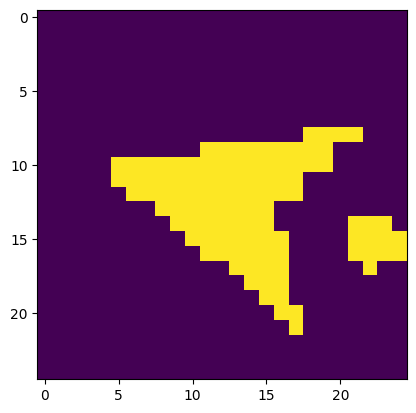

In [379]:
# Convert PIL image to OpenCV-compatible format (NumPy array)
opencv_image = cv.cvtColor(np.array(screen), cv.COLOR_RGB2BGR)

# Convert the OpenCV image to grayscale
gray_image = cv.cvtColor(opencv_image, cv.COLOR_BGR2GRAY)

arrow = cv.threshold(gray_image, 150, 255, 0)
_, binary_image = arrow

plt.imshow(binary_image)

In [380]:
# Find contours in the binary image
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Find the largest contour
largest_contour = max(contours, key=cv.contourArea)
# Create a mask for the largest contour
mask = cv.drawContours(np.zeros_like(binary_image), [largest_contour], 0, (255), thickness=cv.FILLED)
# Apply the mask to extract the largest object
extracted_image = cv.bitwise_and(gray_image, gray_image, mask=mask)

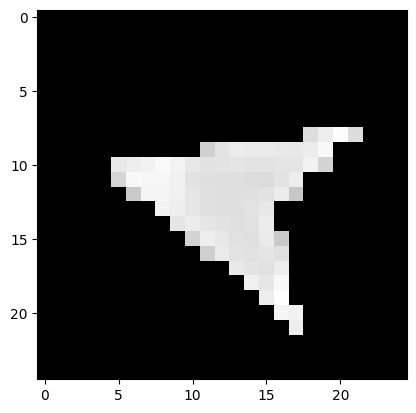

In [381]:
plt.imshow(extracted_image, cmap="gray")

In [382]:
triangle = cv.minEnclosingTriangle(largest_contour)

# Get the vertices of the triangle
pt1, pt2, pt3 = triangle[1]
pt1 = pt1[0]
pt2 = pt2[0]
pt3 = pt3[0]
print([pt1, pt2, pt3])

[array([21.137932,  7.551724], dtype=float32), array([ 3.6216216, 10.054054 ], dtype=float32), array([17., 21.], dtype=float32)]


[17.28568, 14.070488, 17.694145]
vertex_point=[ 3.6216216 10.054054 ]
base_point1=[21.137932  7.551724]
base_point2=[17. 21.]
base_point=[19.06896591 14.27586174]
dx=-15.447344303131104
dy=-4.221807479858398
angle=164.71417604628417


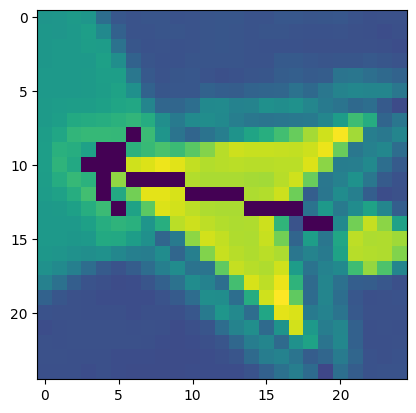

In [383]:
side_lengths = [np.linalg.norm(pt2 - pt3), np.linalg.norm(pt1 - pt3), np.linalg.norm(pt1 - pt2)]
print(side_lengths)
acute_index = side_lengths.index(min(side_lengths))

points = [pt1,pt2,pt3]
vertex_point = points.pop(acute_index)
base_point1, base_point2 = points
print(f"vertex_point={vertex_point}")
print(f"base_point1={base_point1}")
print(f"base_point2={base_point2}")

def compute_middle_point(point1, point2):
    x = (point1[0] + point2[0]) / 2
    y = (point1[1] + point2[1]) / 2
    return np.array([x, y])

base_point = compute_middle_point(base_point1, base_point2)
print(f"base_point={base_point}")

def compute_line_angle(point1, point2):
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    print(f"dx={dx}")
    print(f"dy={dy}")
    angle = np.arctan2(dy, dx) * 180 / math.pi
    return angle
    
angle = compute_line_angle(base_point, vertex_point)
# opencv flips y axis for some reason
angle = angle * -1

pt1 = pt1.astype(int)
pt2 = pt2.astype(int)
pt3 = pt3.astype(int)
base_point = base_point.astype(int)
vertex_point = vertex_point.astype(int)
print(f"angle={angle}")

# cv.circle(gray_image, pt1, 1, (0, 255, 0), -1)
# cv.circle(gray_image, pt2, 1, (0, 255, 0), -1)
# cv.circle(gray_image, pt3, 1, (0, 255, 0), -1)
cv.arrowedLine(gray_image, base_point, vertex_point, (0, 255, 0), tipLength = 0.2)
plt.imshow(gray_image)